In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [242]:
np.random.seed(42)

## Задание 1. KNN и Линейная регрессия

Сгенерировать случайным образом 3 набора данных.

<details>
  <summary>см. картинки</summary>
  
  ![image](https://github.com/Rivgad/innopolis.machine_learning_assignments/assets/55663166/198e8916-43ed-4379-9f85-62e00b39e72f)
</details>

Количество точек в каждом от 100 до 200. Цветом обозначены метки классов.

Для каждого набора данных:

- Разделить датасет на train/test(80/20)
- Обучить и протестировать KNN
- Построить графики точности классификации(на train/testвыборках) при разных k(1...8)
- Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений


In [243]:
def create_donut_df(inner_radius, outer_radius, num_points) -> pd.DataFrame:
    angles = 2 * np.pi * np.random.rand(num_points)
    radii = np.random.uniform(inner_radius, outer_radius, num_points)

    return pd.DataFrame({"X": radii * np.cos(angles), "Y": radii * np.sin(angles)})

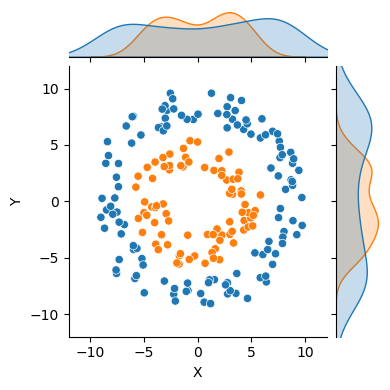

In [244]:
df_class_1 = create_donut_df(7, 10, 120)
df_class_1["Class"] = "Class 1"

df_class_2 = create_donut_df(3, 6, 80)
df_class_2["Class"] = "Class 2"

df_1 = pd.concat([df_class_1, df_class_2])

sns.jointplot(
    data=df_1,
    x="X",
    y="Y",
    hue="Class",
    xlim=(-12, 12),
    ylim=(-12, 12),
    height=4,
    legend=False,
)

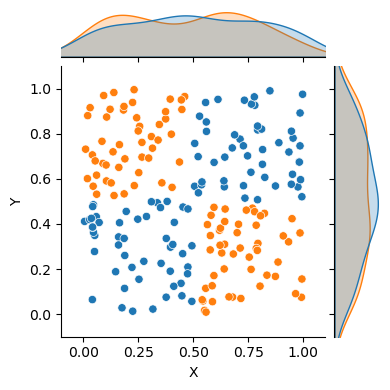

In [245]:
df_class_1 = pd.DataFrame(
    {
        "X": np.concatenate(
            [np.random.uniform(0, 0.5, 50), np.random.uniform(0.5, 1, 50)]
        ),
        "Y": np.concatenate(
            [np.random.uniform(0, 0.5, 50), np.random.uniform(0.5, 1, 50)]
        ),
        "Class": "Class 1",
    }
)
df_class_2 = pd.DataFrame(
    {
        "X": np.concatenate(
            [np.random.uniform(0, 0.5, 50), np.random.uniform(0.5, 1, 50)]
        ),
        "Y": np.concatenate(
            [np.random.uniform(0.5, 1, 50), np.random.uniform(0, 0.5, 50)]
        ),
        "Class": "Class 2",
    }
)

df_2 = pd.concat([df_class_1, df_class_2])

sns.jointplot(
    data=df_2,
    x="X",
    y="Y",
    hue="Class",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    height=4,
    legend=False,
)

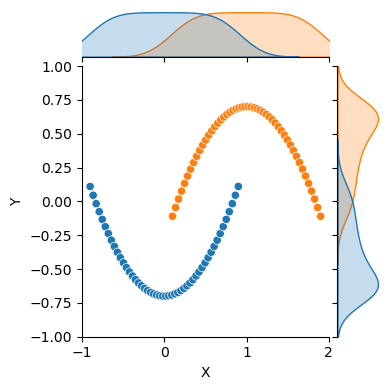

In [246]:
x_1 = np.linspace(-0.9, 0.9, 50)
y_1 = x_1**2 - 0.7


df_class_1 = pd.DataFrame(
    {
        "X": x_1,
        "Y": y_1,
        "Class": "Class 1",
    }
)


x_2 = np.linspace(0.1, 1.9, 50)
y_2 = -((x_2 - 1) ** 2) + 0.7

df_class_2 = pd.DataFrame(
    {
        "X": x_2,
        "Y": y_2,
        "Class": "Class 2",
    }
)

df_3 = pd.concat([df_class_1, df_class_2])

sns.jointplot(
    data=df_3,
    x="X",
    y="Y",
    hue="Class",
    xlim=(-1, 2),
    ylim=(-1, 1),
    height=4,
    legend=False,
)

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)


def best_knn(df: pd.DataFrame):
    Coordinate = df[["X", "Y"]]
    classes = df["Class"]
    Cord_train, Cord_test, classes_train, classes_test = train_test_split(
        Coordinate, classes, test_size=0.2
    )

    k_values = range(1, 9)
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Cord_train, classes_train)
        y_pred = knn.predict(Cord_test)
        accuracy_scores.append(accuracy_score(classes_test, y_pred))

    best_k = k_values[np.argmax(accuracy_scores)]
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(Cord_train, classes_train)

    classes_predicted = best_knn.predict(Cord_test)

    precision = precision_score(classes_test, classes_predicted, average="weighted")
    recall = recall_score(classes_test, classes_predicted, average="weighted")
    f1 = f1_score(classes_test, classes_predicted, average="weighted")

    plt.ylim(0, 1.1)
    sns.lineplot(x=k_values, y=accuracy_scores, markers=True)
    plt.show()

    print(f"Точность (Precision): {precision}")
    print(f"Полнота (Recall): {recall}")
    print(f"F1-мера (F1-Score): {f1}")

    sns.heatmap(
        data=confusion_matrix(classes_test, classes_predicted), annot=True, cmap="crest"
    )
    plt.show()

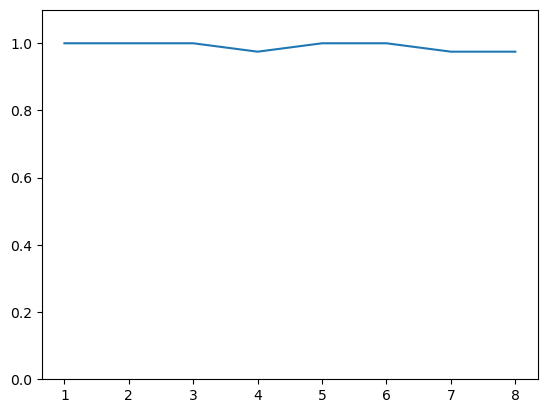

Точность (Precision): 1.0
Полнота (Recall): 1.0
F1-мера (F1-Score): 1.0


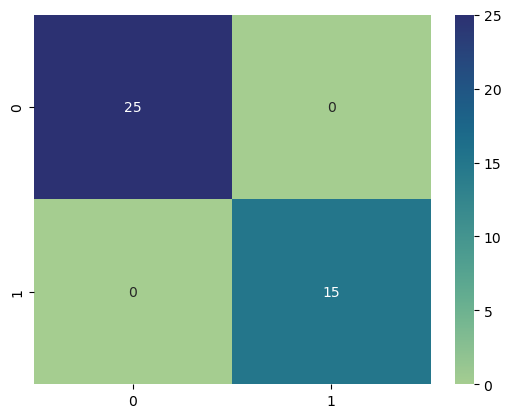

In [248]:
best_knn(df=df_1)

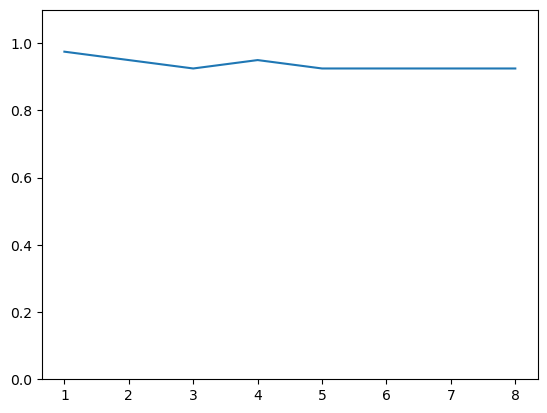

Точность (Precision): 0.9763157894736842
Полнота (Recall): 0.975
F1-мера (F1-Score): 0.9750471401634193


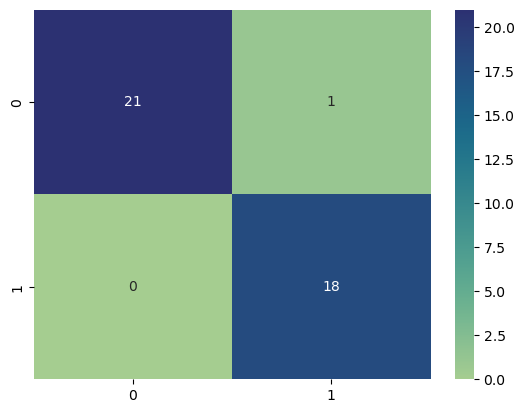

In [249]:
best_knn(df=df_2)

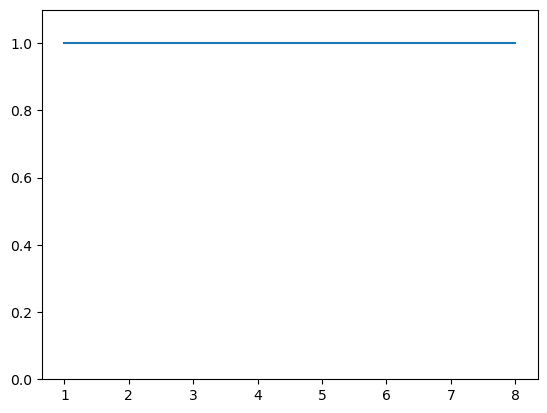

Точность (Precision): 1.0
Полнота (Recall): 1.0
F1-мера (F1-Score): 1.0


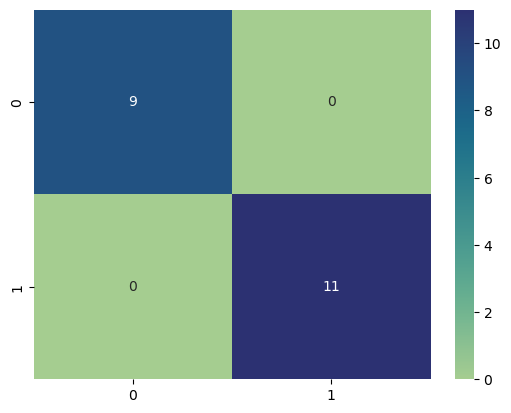

In [250]:
best_knn(df=df_3)